In [14]:
import pandas as pd
import numpy as np

In [15]:
train=pd.read_csv("C:/Users/HP Folio/Desktop/Spark_python/Data/train.csv", sep=",")
test=pd.read_csv("C:/Users/HP Folio/Desktop/Spark_python/Data/test.csv", sep=",")

# Dimension du dataframe train

In [16]:
# Nombre de lignes et de colonnes
train.shape

(891, 12)

# Affichage des 5 premières lignes du data frame train

In [17]:
# Affichage des 5 premières lignes du data frame train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.info()
# On constate que les variables Age, Cabin et Embarked ont des valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Nombre de survivants

In [19]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Pourcentage des valeurs manquantes

In [20]:
train.isna().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [21]:
def cast(col_name):
    for col in col_name:
        A=train[col].astype("object")
    return A

In [22]:
train["Parch"]=cast(["Parch"]).astype("object")
train["Survived"]=cast(["Survived"])
train["Pclass"]=cast(["Pclass"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [23]:
def input_missing_values(df):
    for col in train.columns:
        if(df[col].dtype is float) or (df[col].dtype is int):
            df[col]=df[col].fillna(df[col].median())
        if (df[col].dtype==object):
            df[col]=df[col].fillna(df[col].mode()[0])
    return df
a=input_missing_values(train)

In [24]:
train.isna().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
dtype: float64

In [25]:
def parse_model(X, use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should not belong to df")
        
        target=X["Survived"]
        X=X[use_columns]
        return X, target
    model_cols1=["SibSp","Parch","Fare"]
    X,y=parse_model(X=train.copy(), use_column=model_cols1)

Split in train and test set

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, random_state=0)
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,B96 B98,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,B96 B98,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,B96 B98,C
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,B96 B98,C
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,B96 B98,S


# Regression logistic

In [66]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [68]:
lr=LogisticRegression()
#lr.fit(X_train, y_train)

In [69]:
def compute_score(clf, X, y,):
    """"compute score in a classification modelisation.
        clf
    """
    xval=cross_val_score(Clf, X, y, cv=5)

In [70]:
survived=train[train.Survived==1]
dead=train[train.Survived==0]

Populating the interactive namespace from numpy and matplotlib


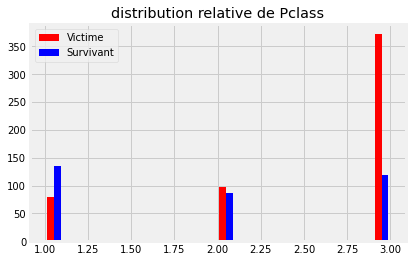

In [71]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
%matplotlib inline
%pylab inline
def plot_hist(feature, bins=20):
    x1=np.array(dead[feature].dropna())
    x2=np.array(survived[feature].dropna())
    plt.hist([x1,x2], label=["Victime", "Survivant"], bins=bins, color =["r","b"])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

Populating the interactive namespace from numpy and matplotlib


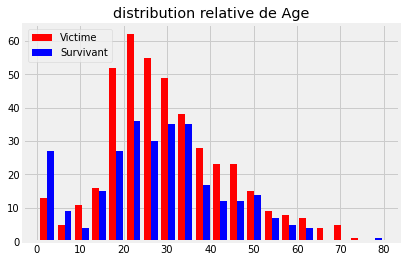

In [72]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
%matplotlib inline
%pylab inline
def plot_hist(feature, bins=20):
    x1=np.array(dead[feature].dropna())
    x2=np.array(survived[feature].dropna())
    plt.hist([x1,x2], label=["Victime", "Survivant"], bins=bins, color =["r","b"])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Age')

In [73]:
def My_model(X, y, size, RdomSate=42):
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=size, random_state=RdomState)
    model=LogisticRegression(random_state=RdomState)
    model.fit(X_train, y_train)
    # Run the model
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1]
    score_train=model.score(X_train, y_train)
    score_test=model.score(X_test, y_test)
    metric=metrics.classification_report(y_test, y_pred)
    return {"y_test":y_test,"prediction":y_pred, "prob":y_prob, "score_train":score_train,"score_test":score_test, "model":model, "metric":print(metric)}


In [74]:
def transform_df(X, columns_to_dummify, features=["Pclass"], thres=10):
    X=convert_df_columns(X, features, type_var="object")
    X["is_child"]=X["Age"].apply(lambda x: 0 if x < thres else 1)
    X["title"]=X["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
    X["surname"]=X["Name"].map(lambda x: '(' in x)
    for col in columns_to_dummify:
        X_dummies=pd.get_dummies(X[col], prefix=col, drop_first=False, dummy_na=False,prefix_sep='_')
        X=X.join(X_dummies).drop(col, axis=1)
        return X.drop('Name', axis=1).drop('Age', axis=1)
columns_to_dummify=["Pclass","Sex","Title","surname"]
X = transform_df(X, columns_to_dummify)
X.head()

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42, n_estimators=100, criterion="gini", max_depth=20)
model.fit(X_train,y_train)

In [ ]:
#Get the score
score=model.score(X_test, y_test)
print("In-test score:{:0.2}".format(score))

In [ ]:
from sklearn import 